## Analysing PS4 sales Data

##### Problem Statement
A teenager wanted to show his mom how many people use PS4 console in the world, so his mom would purchase one for him. So he reached out to Ama to analyze the sales data for PS4 so that his more will have a fair idea of:
1. How many people use PS4 console in the world?
2. Which Game on PS4 console has the highest number of sales?
3. Which Game on PS4 console has the lowest number of sales?

In [2]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

#### Reading The data
This is allows you to know the various rows and columns available.
This allows you to have a clear view of the data, so you will analyse and know what changes to make according to goal of the data cleaning.

In [3]:
with open('PS4_GamesSales.csv', 'rb') as file:
    content = file.read().decode('utf-8', errors='replace')
    with open('cleaned_file.csv', 'w', encoding='utf-8') as clean_file:
        clean_file.write(content)

#Then read the cleaned file
df = pd.read_csv('cleaned_file.csv')

In [ ]:
df.head()

In [ ]:
#reading the various columns
df.columns

In [ ]:
#display the available rows and columns
df.shape

In [ ]:
#Reading the information about the dataset
df.info()

In [ ]:
#Using missingno to visualise the missing value in the dataset
import missingno as msno
msno.bar(df)

In [ ]:
df.describe

#### Data Cleaning 
I will start by Changing some of the names of the columns, dropping Null values, dropping zeros, and changing the datatype of some of the columns.

### Changing  column names to suite the specified goal stated earlier

In [4]:
# changing year to year_published
df.rename(columns={"Year":"Year_Published", "Global":"Total Sales"}, inplace=True)
df.head()

,Game,Year_Published,Genre,Publisher,North America,Europe,Japan,Rest of World,Total Sales
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# confirming if the column name has been changed successfully
df.info()

### Checking DataType and nulls values

In [ ]:
# counting null in the dataset
df.isna().sum()

In [5]:
#dropping the null values 
df = df.dropna(subset=['Year_Published','Publisher'])

In [ ]:
# checking if the nulls were successfully dropped 
df.isna().sum()

In [ ]:
df.describe

#### Checking Zero values count in the dataset

In [ ]:
#count zero values in runtime data using group by
df.groupby("Total Sales").count()

since the zero count is less we are going to drop them

In [5]:
#dropping the zero values in runtime column
df = df[df['Total Sales'] != 0]

In [ ]:
df

## EXPLORATORY DATA ANALYSIS

Q1. 
How many people use PS4 in the world?

In [ ]:
# Printing the total sales made globally an the games
sales = df['Total Sales'].sum()
print("Total Sales: ", sales)

Q2. 
Which Game on PS4 has the highest number of sales?

In [ ]:
# Game with the most sales
max = df.loc[df['Total Sales'].idxmax()]
print("Game With The Highest Number of Sales: ", max)

Q3.
Which Game on PS4 has the lowest number of sales?

In [ ]:
# Game with the fewer sales
min = df.loc[df['Total Sales'].idxmin()]
print("Game With The Lowest Number of Sales: ", min)

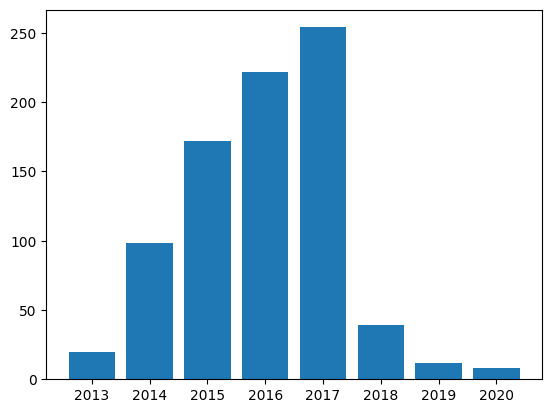

In [30]:
# Bar Graph showing the number of games published each year 
# df['Year_Published'].value_counts().plot(kind='bar')
# plt.show()
df['Year_Published'].value_counts()
plt.bar(df['Year_Published'].value_counts().index, df['Year_Published'].value_counts().values)
plt.show()

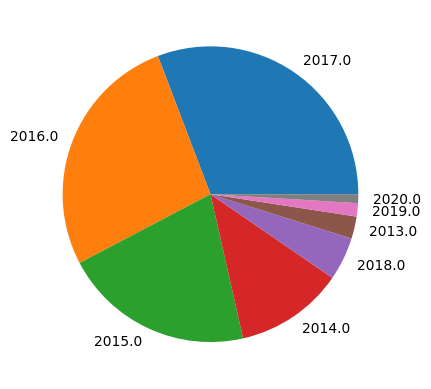

In [7]:
# Pie Chart For Games number of Games release each year
# df['Year'].value_counts().plot(kind='pie')
# plt.show()
data = df['Year_Published'].value_counts()
plt.pie(df['Year_Published'].value_counts().values, labels=df['Year_Published'].value_counts().index)
plt.show()